# INTRODUCTION
The purpose of this project is to build the model that results in the best accuracy (0.75 or better) for predicting the correct Megaline plan (Smart or Ultra) based on a number of user tendencies including call duration and minute, text and data usage.

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from joblib import dump

In [2]:
df=pd.read_csv('/datasets/users_behavior.csv')

In [3]:
df
df.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [4]:
df.shape

(3214, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [6]:
df.isna().sum()

calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df["is_ultra"].value_counts()

0    2229
1     985
Name: is_ultra, dtype: int64

In [9]:
features=df.drop(["is_ultra"], axis=1)

In [10]:
target=df["is_ultra"]

In [11]:
df_train, df_valid = train_test_split(df, test_size=0.20, random_state=12345)
df_train, df_test=train_test_split(df_train, test_size=0.20, random_state=12345)

* Above, the data is split into three sets: validation set, test set, and training set.

In [12]:
print("The actual size of the validation set is", len(df_valid) / len(df))
print("The actual size of the training set is", len(df_train) /len(df))
print("The actual size of the test set is", len(df_test) / len(df))

The actual size of the validation set is 0.2000622277535781
The actual size of the training set is 0.6397013067828251
The actual size of the test set is 0.16023646546359677


In [13]:
features_train = df_train.drop(["is_ultra"], axis=1)
target_train = df_train['is_ultra']
features_valid = df_valid.drop(['is_ultra'], axis=1)
target_valid = df_valid['is_ultra']
features_test=df_test.drop(["is_ultra"], axis=1)
target_test=df_test['is_ultra']

* First, I will begin using the Random Forest Model, and search for the best n_estimators and max_depth hyperparameter that result in the highest accuracy score.

In [14]:
best_model = None
best_result = 10000
best_est = 0
best_depth = 0
for est in range(10, 51, 10):
    for depth in range (1, 11):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth) # initialize model constructor with parameters random_state=12345 and n_estimators=est
        model.fit(features_train, target_train) # train model on training set
        predictions_valid = model.predict(features_valid) # get model predictions on validation set
        result = model.score(features_valid, target_valid)
        if result < best_result:
            best_model = model
            best_result = result
            best_est = est
            best_depth = depth

print("The accuracy score of the best model on the validation set:", best_result, "n_estimators:", best_est, "best_depth:", depth)

The accuracy score of the best model on the validation set: 0.7558320373250389 n_estimators: 20 best_depth: 10


In [15]:
final_model = RandomForestClassifier(random_state=54321, n_estimators=20, max_depth=10) # change n_estimators to get best model
final_model.fit(features_train, target_train)

RandomForestClassifier(max_depth=10, n_estimators=20, random_state=54321)

In [16]:
y_pred=final_model.predict(features_test)

In [17]:
acc=final_model.score(features_test, target_test)
acc

0.7728155339805826

In [18]:
conf_matrix = metrics.confusion_matrix(target_test, y_pred)

In [19]:
print("Accuracy of the RandomForest model on the test set is", acc)

Accuracy of the RandomForest model on the test set is 0.7728155339805826


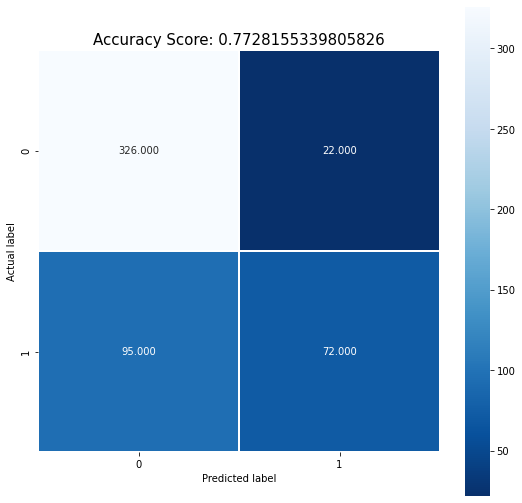

In [20]:
plt.figure(figsize=(9,9))
sns.heatmap(conf_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(acc)
plt.title(all_sample_title, size = 15);

* The confustion matrix above outlines the exact number of accurate and inaccurate predictions. I will be using a confusion matrix for each model's determined accuracy score.

In [21]:
accuracy = accuracy_score(target_test, y_pred)

In [22]:
accuracy

0.7728155339805826

* Next, I will try Decision Tree Classifier. 

In [23]:
for depth in range(1,11):
    model=DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train, target_train)
    predictions_valid= model.predict(features_valid)
    print("max_depth =", depth, ": ", end='')
    print(accuracy_score(target_valid, predictions_valid)) 

max_depth = 1 : 0.7480559875583204
max_depth = 2 : 0.7838258164852255
max_depth = 3 : 0.7869362363919129
max_depth = 4 : 0.7884914463452566
max_depth = 5 : 0.7791601866251944
max_depth = 6 : 0.7838258164852255
max_depth = 7 : 0.7916018662519441
max_depth = 8 : 0.7853810264385692
max_depth = 9 : 0.7869362363919129
max_depth = 10 : 0.7900466562986003


* The best max_depth hyperparameter results in max_depth=7 for the DecisionTree model, so I will use the test set to test the model.

In [24]:
final_model2=DecisionTreeClassifier(random_state=12345, max_depth=7)
final_model2.fit(features_train, target_train)
y_pred2=final_model2.predict(features_test)

In [25]:
acc2=final_model2.score(features_test, target_test)

In [26]:
acc2

0.7650485436893204

In [27]:
accuracy2=accuracy_score(target_test, y_pred2)
accuracy2

0.7650485436893204

In [28]:
print("Accuracy of the Decision Tree model on the test set is", acc2)

Accuracy of the Decision Tree model on the test set is 0.7650485436893204


In [29]:
y_pred2=final_model2.predict(features_test)

In [30]:
conf_matrix2 = metrics.confusion_matrix(target_test, y_pred2)

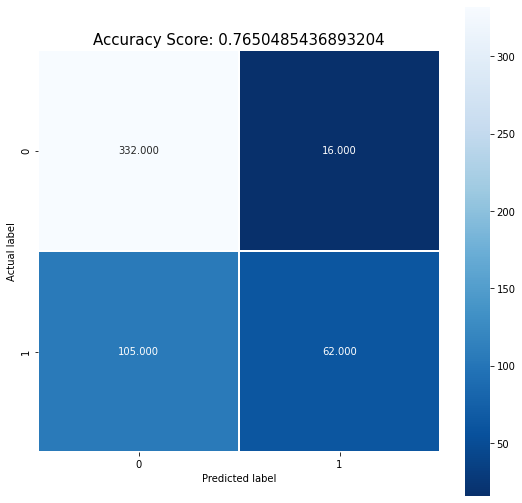

In [31]:
plt.figure(figsize=(9,9))
sns.heatmap(conf_matrix2, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(acc2)
plt.title(all_sample_title, size = 15);

In [32]:
model=LogisticRegression(random_state=12345, solver='lbfgs')
model.fit(features_train, target_train)
model.score(features_train, target_train)
dump(model, 'model_9_1.joblib')

['model_9_1.joblib']

In [33]:
acc3=model.score(features_test, target_test)

In [34]:
acc3

0.7165048543689321

In [35]:
y_pred3=model.predict(features_test)

In [36]:
accuracy3=accuracy_score(target_test, y_pred3)

In [37]:
print("The accuracy score for the Logistic Regression model is", accuracy3)

The accuracy score for the Logistic Regression model is 0.7165048543689321


In [38]:
conf_matrix3 = metrics.confusion_matrix(target_test, y_pred3)

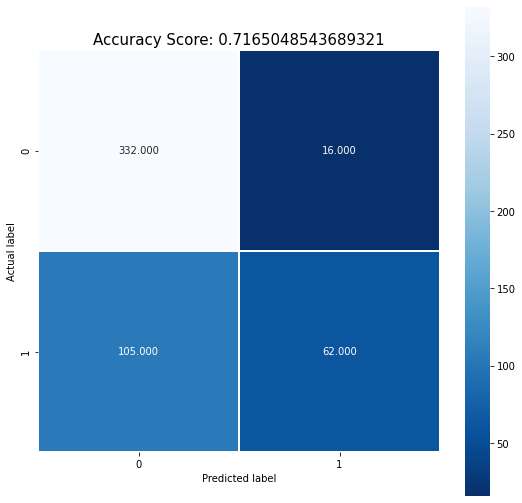

In [39]:
plt.figure(figsize=(9,9))
sns.heatmap(conf_matrix2, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(acc3)
plt.title(all_sample_title, size = 15);

# CONCLUSION
* In order to determine the model that would generate the highest accuracy score, the original dataset was categorized accordingly by identifying the ['is_ultra'] column as the target or dependent variable and all the remaining columns as respective features or independent variables. The dataset was previously preprocessed and ready to train, with no missing values or duplicates. Prior to training each model, the dataset was split into three sets:a training set (60%), a test set(20%) and a validation set (20%). The actual size of each set was determined to be 63.9%, 16.1% and 20% respectively.


* It is important to note that the target variable ["is_ultra"] contained about half as many ultra users (['is_ultra']=1), compared to Smart users (['is_ultra']=0), so it was disproportionate. After tuning the hyperparameters accordingly, the model that has the best accuracy out of all three classification models was the first model, which was the RandomForestClassifier model (max_depth=10, n_estimators=20, random_state=54321).


* The RandomForest model resulted in an accuracy score of 77.28%. The Decision Tree Classifier model (max_depth=7) resulted in an accuracy score of 76.50%. Finally, the Logistic Regression model came in last with an accuracy score of 71.65%. 